# AIR QUALITY ANALYSIS

#### Understanding the Data

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("AQI.csv")

In [6]:
# Display the first 5 rows of the dataset
print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,Color
0,51,1,36,0,51,44.7444,44.2031,yellow
1,41,1,5,1,41,-5.2900,-44.4900,green
2,41,1,5,1,41,-11.2958,-41.9869,green
3,66,1,39,2,66,37.1667,15.1833,yellow
4,34,1,34,0,20,53.0167,20.8833,green
5,54,1,14,11,54,16.1005,-88.8074,yellow
6,54,1,14,11,54,26.8941,-82.0513,yellow
7,64,1,29,7,64,51.0761,4.2803,yellow
8,54,1,41,1,54,44.0500,43.0667,yellow
9,68,2,68,1,58,21.9500,108.6167,yellow


In [8]:
# Get the basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
 7   Color            16695 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [5]:
# Check for missing/null values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64


In [6]:
# Display statistical summary of the dataset
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [7]:
# Get the column names
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']


In [8]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [9]:
# Check for unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
AQI Value: 282 unique values
CO AQI Value: 31 unique values
Ozone AQI Value: 203 unique values
NO2 AQI Value: 56 unique values
PM2.5 AQI Value: 298 unique values
lat: 14135 unique values
lng: 14896 unique values


In [10]:
# Check the distribution of all AQI-related columns
aqi_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

print("\nDistribution of AQI and Pollutants:")
for col in aqi_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts().head(10))  # Top 10 most frequent values


Distribution of AQI and Pollutants:

AQI Value Distribution:
AQI Value
50    413
52    374
35    366
51    359
54    352
39    337
34    334
53    328
45    328
37    323
Name: count, dtype: int64

CO AQI Value Distribution:
CO AQI Value
1    10956
2     2292
0     2020
3      758
4      337
5      126
6       48
7       33
9       20
8       18
Name: count, dtype: int64

Ozone AQI Value Distribution:
Ozone AQI Value
30    620
32    522
29    520
31    517
28    508
27    508
33    502
25    476
24    470
23    469
Name: count, dtype: int64

NO2 AQI Value Distribution:
NO2 AQI Value
0    4930
1    2999
2    1978
3    1458
4    1026
5     720
6     577
7     445
8     393
9     268
Name: count, dtype: int64

PM2.5 AQI Value Distribution:
PM2.5 AQI Value
50    413
52    364
54    354
51    347
53    324
55    309
56    304
58    288
57    280
35    266
Name: count, dtype: int64


### Two New Columns

In [16]:
# Define AQI categories and colors based on standard AQI levels
def categorize_aqi(value):
    if value <= 50:
        return "Good", "Green"
    elif value <= 100:
        return "Moderate", "Yellow"
    elif value <= 150:
        return "Unhealthy for Sensitive Groups", "Orange"
    elif value <= 200:
        return "Unhealthy", "Red"
    elif value <= 300:
        return "Very Unhealthy", "Purple"
    else:
        return "Hazardous", "Maroon"

# Apply the function to create new columns
df[['AQI Category', 'AQI Color']] = df['AQI Value'].apply(lambda x: pd.Series(categorize_aqi(x)))

# Display updated DataFrame with AQI categories and colors
display(df.head(15))

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,Color,AQI Category,AQI Color
0,51,1,36,0,51,44.7444,44.2031,yellow,Moderate,Yellow
1,41,1,5,1,41,-5.2900,-44.4900,green,Good,Green
2,41,1,5,1,41,-11.2958,-41.9869,green,Good,Green
3,66,1,39,2,66,37.1667,15.1833,yellow,Moderate,Yellow
4,34,1,34,0,20,53.0167,20.8833,green,Good,Green
5,54,1,14,11,54,16.1005,-88.8074,yellow,Moderate,Yellow
6,54,1,14,11,54,26.8941,-82.0513,yellow,Moderate,Yellow
7,64,1,29,7,64,51.0761,4.2803,yellow,Moderate,Yellow
8,54,1,41,1,54,44.0500,43.0667,yellow,Moderate,Yellow
9,68,2,68,1,58,21.9500,108.6167,yellow,Moderate,Yellow


In [17]:
# Get dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
 7   Color            16695 non-null  object 
 8   AQI Category     16695 non-null  object 
 9   AQI Color        16695 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


In [18]:
# Check for missing/null values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
Color              0
AQI Category       0
AQI Color          0
dtype: int64


In [19]:
# Display statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [20]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [21]:
# Check unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
AQI Value: 282 unique values
CO AQI Value: 31 unique values
Ozone AQI Value: 203 unique values
NO2 AQI Value: 56 unique values
PM2.5 AQI Value: 298 unique values
lat: 14135 unique values
lng: 14896 unique values
Color: 6 unique values
AQI Category: 6 unique values
AQI Color: 6 unique values


In [22]:
# Check the distribution of AQI values and pollutants
aqi_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

print("\nDistribution of AQI and Pollutants:")
for col in aqi_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts().head(10))  # Top 10 most frequent values


Distribution of AQI and Pollutants:

AQI Value Distribution:
AQI Value
50    413
52    374
35    366
51    359
54    352
39    337
34    334
53    328
45    328
37    323
Name: count, dtype: int64

CO AQI Value Distribution:
CO AQI Value
1    10956
2     2292
0     2020
3      758
4      337
5      126
6       48
7       33
9       20
8       18
Name: count, dtype: int64

Ozone AQI Value Distribution:
Ozone AQI Value
30    620
32    522
29    520
31    517
28    508
27    508
33    502
25    476
24    470
23    469
Name: count, dtype: int64

NO2 AQI Value Distribution:
NO2 AQI Value
0    4930
1    2999
2    1978
3    1458
4    1026
5     720
6     577
7     445
8     393
9     268
Name: count, dtype: int64

PM2.5 AQI Value Distribution:
PM2.5 AQI Value
50    413
52    364
54    354
51    347
53    324
55    309
56    304
58    288
57    280
35    266
Name: count, dtype: int64


In [23]:
# Display unique AQI Categories
print("\nAQI Categories Available in the Data:")
print(df['AQI Category'].value_counts())


AQI Categories Available in the Data:
AQI Category
Good                              7708
Moderate                          7081
Unhealthy for Sensitive Groups     899
Unhealthy                          814
Very Unhealthy                     131
Hazardous                           62
Name: count, dtype: int64


In [24]:
print("\nAQI Value Mapping with Categories and Colors:")
print(df[['AQI Value', 'AQI Category', 'AQI Color']].head(20))  # Display first 20 rows


AQI Value Mapping with Categories and Colors:
    AQI Value AQI Category AQI Color
0          51     Moderate    Yellow
1          41         Good     Green
2          41         Good     Green
3          66     Moderate    Yellow
4          34         Good     Green
5          54     Moderate    Yellow
6          54     Moderate    Yellow
7          64     Moderate    Yellow
8          54     Moderate    Yellow
9          68     Moderate    Yellow
10         41         Good     Green
11         59     Moderate    Yellow
12         55     Moderate    Yellow
13         72     Moderate    Yellow
14         28         Good     Green
15        154    Unhealthy       Red
16         67     Moderate    Yellow
17         62     Moderate    Yellow
18         31         Good     Green
19         56     Moderate    Yellow


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

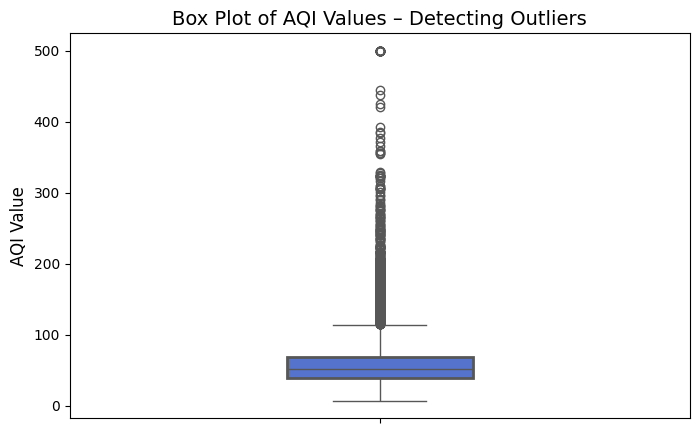

In [26]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create a Box Plot for AQI Values
sns.boxplot(y=df["AQI Value"], color="royalblue", width=0.3, boxprops=dict(linewidth=2))

# Labels and title
plt.ylabel("AQI Value", fontsize=12)
plt.title("Box Plot of AQI Values – Detecting Outliers", fontsize=14)

# Show plot
plt.show()

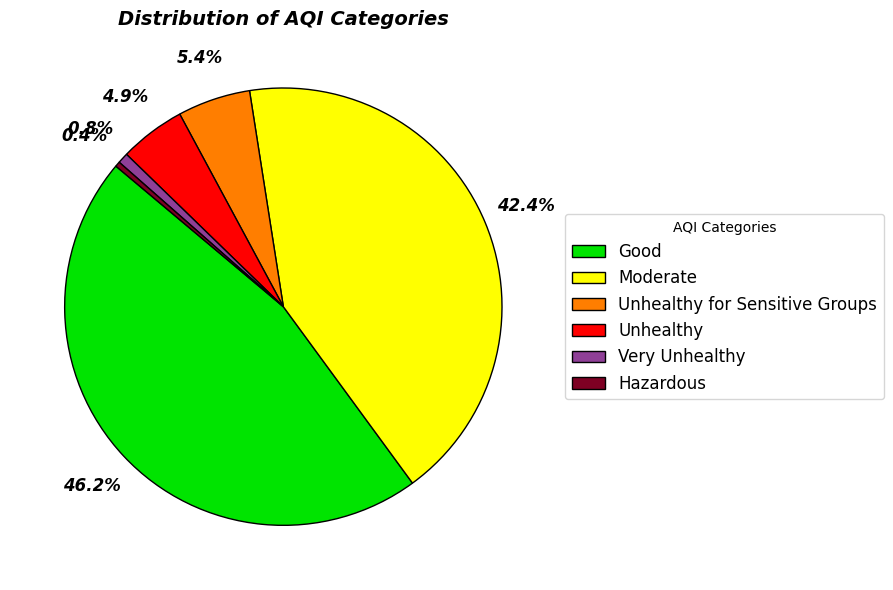

In [27]:
# Count occurrences of each AQI category
category_counts = df["AQI Category"].value_counts()

# Define AQI category colors as per standard AQI ranges
aqi_colors = {
    "Good": "#00E400",        # Green
    "Moderate": "#FFFF00",    # Yellow
    "Unhealthy for Sensitive Groups": "#FF7E00",  # Orange
    "Unhealthy": "#FF0000",   # Red
    "Very Unhealthy": "#8F3F97",  # Purple
    "Hazardous": "#7E0023"    # Maroon
}

# Get corresponding colors for the categories
colors = [aqi_colors[category] for category in category_counts.index]

# Create pie chart
fig, ax = plt.subplots(figsize=(9, 6))
wedges, _ = ax.pie(category_counts, colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})

# Add percentage values outside the pie chart
total = sum(category_counts)
for wedge, count in zip(wedges, category_counts):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Midpoint of wedge
    x = np.cos(np.radians(angle)) * 1.2  # Adjusted x position
    y = np.sin(np.radians(angle)) * 1.2  # Adjusted y position
    ax.text(x, y, f"{count/total*100:.1f}%", fontsize=12, fontweight='bold', 
            style='italic', ha='center', va='center')

# Add a legend instead of labels inside the pie chart
ax.legend(wedges, category_counts.index, title="AQI Categories", loc="center left", 
          bbox_to_anchor=(1, 0.5), fontsize=12)

# Title
plt.title("Distribution of AQI Categories", fontsize=14, fontweight='bold', style='italic')

# Show plot
plt.tight_layout()
plt.show()

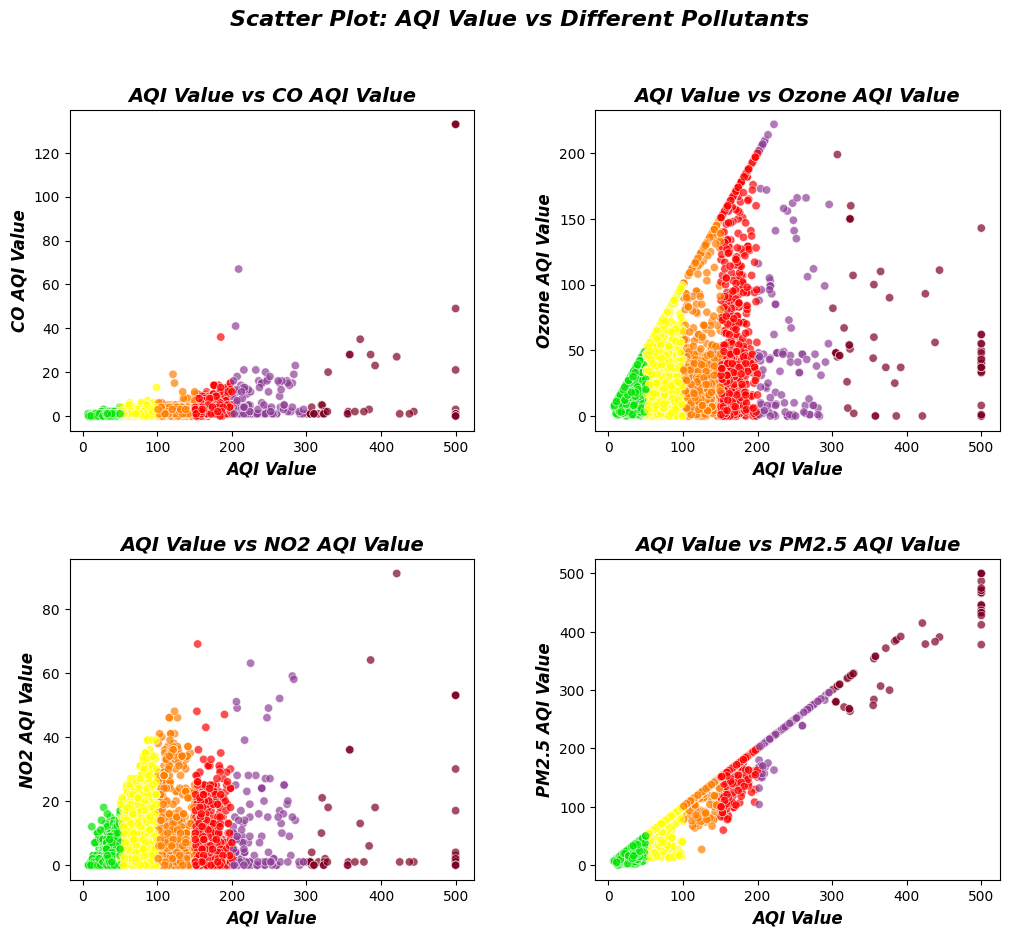

In [28]:
# Define AQI category colors
aqi_colors = {
    "Good": "#00E400",        # Green
    "Moderate": "#FFFF00",    # Yellow
    "Unhealthy for Sensitive Groups": "#FF7E00",  # Orange
    "Unhealthy": "#FF0000",   # Red
    "Very Unhealthy": "#8F3F97",  # Purple
    "Hazardous": "#7E0023"    # Maroon
}

# Assign colors based on AQI category
df["Color"] = df["AQI Category"].map(aqi_colors)

# List of pollutants based on your dataset
pollutants = ["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

# Create scatter plots for each pollutant
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Arrange in a 2x2 grid
axes = axes.flatten()  # Flatten axes for easy iteration

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x=df["AQI Value"], y=df[pollutant], c=df["Color"], alpha=0.7, ax=axes[i])
    
    # Titles and labels with italic-bold styling
    axes[i].set_title(f"AQI Value vs {pollutant}", fontsize=14, fontweight='bold', style='italic')
    axes[i].set_xlabel("AQI Value", fontsize=12, fontweight='bold', style='italic')
    axes[i].set_ylabel(pollutant, fontsize=12, fontweight='bold', style='italic')

# Increase spacing to avoid overlap
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.3)  # Adjust top margin, height & width spacing

# Add a main title
plt.suptitle("Scatter Plot: AQI Value vs Different Pollutants", fontsize=16, fontweight='bold', style='italic')

plt.show()

In [29]:
print(df.columns)

Index(['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
       'PM2.5 AQI Value', 'lat', 'lng', 'Color', 'AQI Category', 'AQI Color'],
      dtype='object')


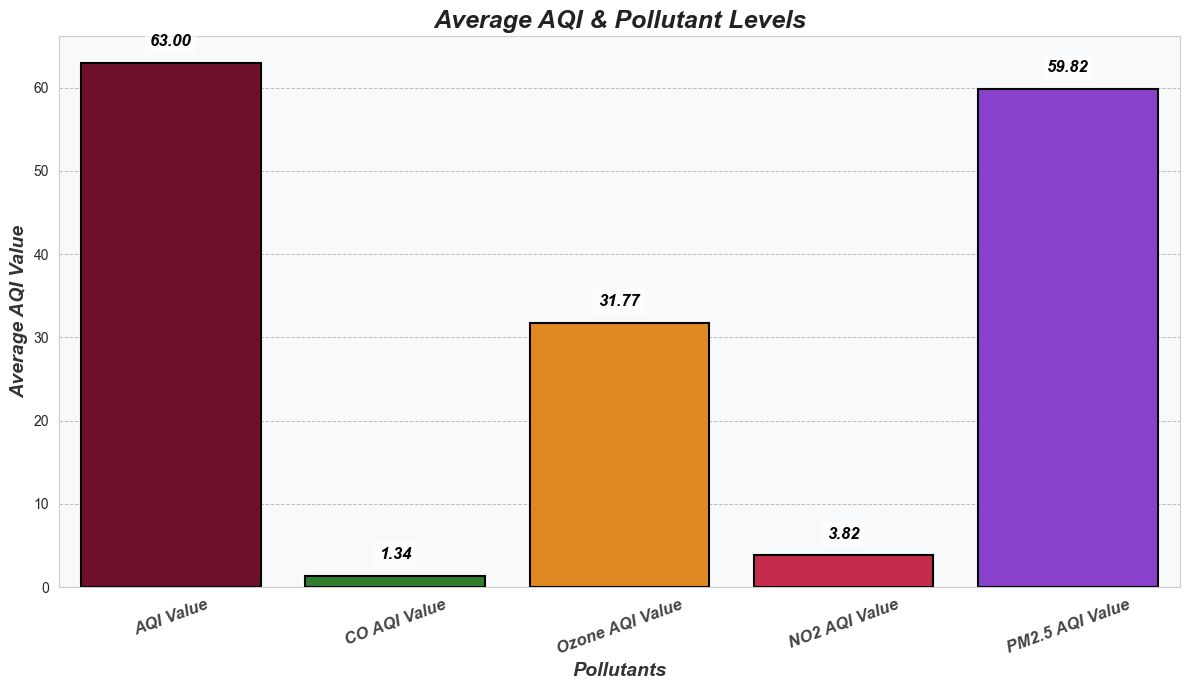

In [30]:
# List of pollutants including AQI Value
pollutants = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

# Calculate average values for each column
avg_values = df[pollutants].mean()

# Define a more visually appealing color palette
colors = ["#7E0023", "#228B22", "#FF8C00", "#DC143C", "#8A2BE2"]  # AQI (Maroon), Green, Orange, Red, Purple

# Create a DataFrame for plotting
avg_pollutants_df = avg_values.reset_index()
avg_pollutants_df.columns = ["Pollutant", "Average AQI Value"]

# Set figure size and background style
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create bar plot with edge colors for better clarity
bars = sns.barplot(
    data=avg_pollutants_df, 
    x="Pollutant", 
    y="Average AQI Value", 
    hue="Pollutant", 
    palette=colors, 
    legend=False,
    edgecolor="black",  # Adds border to bars
    linewidth=1.5
)

# Add value labels on top of bars with a subtle shadow
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,  
        f'{bar.get_height():.2f}', 
        ha='center', 
        fontsize=12, 
        fontweight='bold', 
        style='italic',
        color="black",
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')  # Adds subtle background to text
    )

# Labels & Title with Italic-Bold Font
plt.xlabel("Pollutants", fontsize=14, fontweight='bold', style='italic', color="#333333")
plt.ylabel("Average AQI Value", fontsize=14, fontweight='bold', style='italic', color="#333333")
plt.title("Average AQI & Pollutant Levels", fontsize=18, fontweight='bold', style='italic', color="#222222")

# Adjust X-ticks
plt.xticks(rotation=20, fontsize=12, fontweight='bold', style='italic', color="#444444")

# Improve grid style
plt.grid(axis='y', linestyle='--', alpha=0.5, linewidth=0.7, color="gray")

# Add a subtle background to figure
plt.gca().set_facecolor("#F8F9FA")  # Light gray background

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


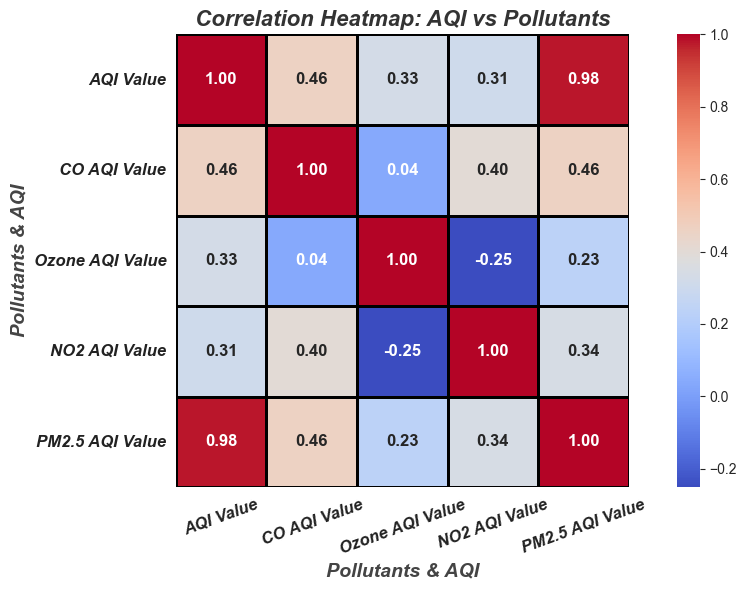

In [31]:
# Select relevant columns for correlation analysis
corr_columns = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
correlation_matrix = df[corr_columns].corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap with styling
sns.heatmap(
    correlation_matrix, 
    annot=True,                          # Show correlation values inside heatmap
    fmt=".2f",                           # Format numbers to 2 decimal places
    cmap="coolwarm",                     # Use a visually appealing color map
    linewidths=1,                        # Add white lines between cells
    linecolor="black",                    # Make grid black for contrast
    annot_kws={"size": 12, "weight": "bold"},  # Styling for annotations
    square=True                          # Make it square for symmetry
)

# Add title with bold & italic styling
plt.title("Correlation Heatmap: AQI vs Pollutants", fontsize=16, fontweight='bold', style='italic', color="#333333")

# Label axes with bold & italic fonts
plt.xlabel("Pollutants & AQI", fontsize=14, fontweight='bold', style='italic', color="#444444")
plt.ylabel("Pollutants & AQI", fontsize=14, fontweight='bold', style='italic', color="#444444")

# Improve tick label styles
plt.xticks(fontsize=12, fontweight='bold', style='italic', rotation=20, color="#222222")
plt.yticks(fontsize=12, fontweight='bold', style='italic', color="#222222")

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

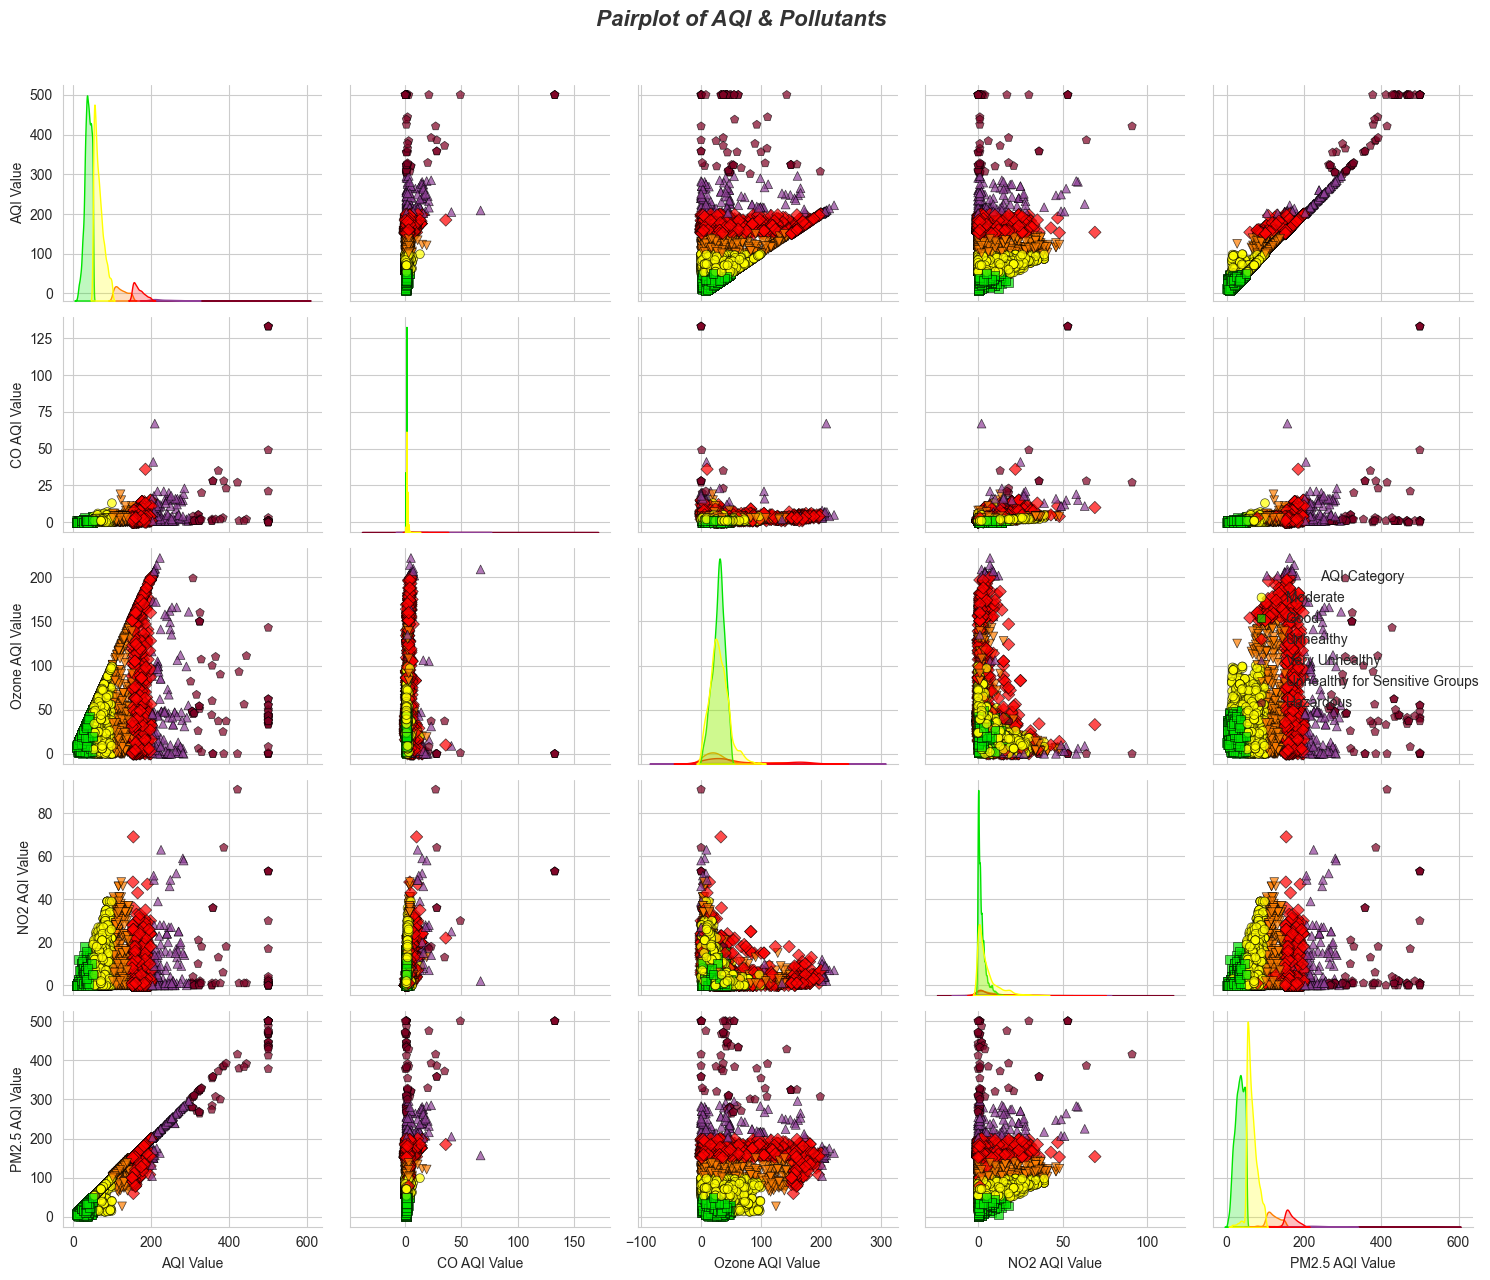

In [32]:
# Define AQI categories and corresponding colors
def get_aqi_category(aqi_value):
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Moderate"
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi_value <= 200:
        return "Unhealthy"
    elif aqi_value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply function to categorize AQI values
df["AQI Category"] = df["AQI Value"].apply(get_aqi_category)

# Define color palette for AQI categories
aqi_palette = {
    "Good": "#00E400",      # Green
    "Moderate": "#FFFF00",  # Yellow
    "Unhealthy for Sensitive Groups": "#FF7E00",  # Orange
    "Unhealthy": "#FF0000", # Red
    "Very Unhealthy": "#8F3F97",  # Purple
    "Hazardous": "#7E0023"  # Maroon
}

# Select relevant columns for pairplot
pairplot_columns = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

# Set seaborn style
sns.set_style("whitegrid")

# Create Pairplot with proper marker handling
pairplot = sns.pairplot(
    df[pairplot_columns + ["AQI Category"]],
    hue="AQI Category",       # Color by AQI category
    palette=aqi_palette,      # Apply color palette
    diag_kind="kde",          # KDE plot for diagonal elements
    markers=["o", "s", "D", "^", "v", "p"],  # Assign multiple markers
    plot_kws={"alpha": 0.7, "s": 40, "edgecolor": "black"},  # Styling scatter plots
    diag_kws={"fill": True}  # Replaced shade=True with fill=True
)

# Improve title and spacing
pairplot.fig.suptitle("Pairplot of AQI & Pollutants", fontsize=16, fontweight="bold", style="italic", color="#333333", y=1.02)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


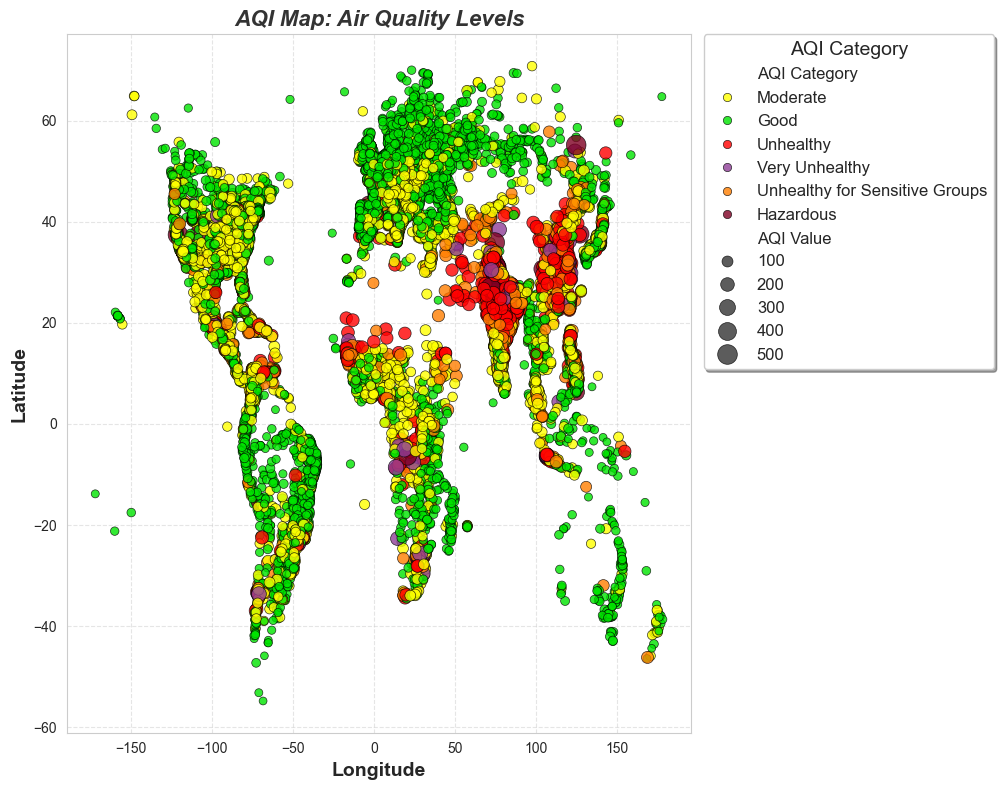

In [33]:
# Define AQI categories and corresponding colors
def get_aqi_category(aqi_value):
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Moderate"
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi_value <= 200:
        return "Unhealthy"
    elif aqi_value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply function to categorize AQI values
df["AQI Category"] = df["AQI Value"].apply(get_aqi_category)

# Define color palette for AQI categories
aqi_palette = {
    "Good": "#00E400",      # Green
    "Moderate": "#FFFF00",  # Yellow
    "Unhealthy for Sensitive Groups": "#FF7E00",  # Orange
    "Unhealthy": "#FF0000", # Red
    "Very Unhealthy": "#8F3F97",  # Purple
    "Hazardous": "#7E0023"  # Maroon
}

# Set plot size
plt.figure(figsize=(12, 8))

# Scatter plot with AQI color coding
scatter = sns.scatterplot(
    x=df["lng"], y=df["lat"], hue=df["AQI Category"], 
    palette=aqi_palette, size=df["AQI Value"], sizes=(30, 200), edgecolor="black", alpha=0.8
)

# Add labels and title
plt.xlabel("Longitude", fontsize=14, fontweight="bold")
plt.ylabel("Latitude", fontsize=14, fontweight="bold")
plt.title("AQI Map: Air Quality Levels", fontsize=16, fontweight="bold", style="italic", color="#333333")

# Adjust legend position to be OUTSIDE the plot
legend = plt.legend(
    title="AQI Category", loc="upper left", fontsize=12, title_fontsize=14, 
    bbox_to_anchor=(1.02, 1), borderaxespad=0, frameon=True, shadow=True
)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Resizes plot to give space for legend

# Display the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

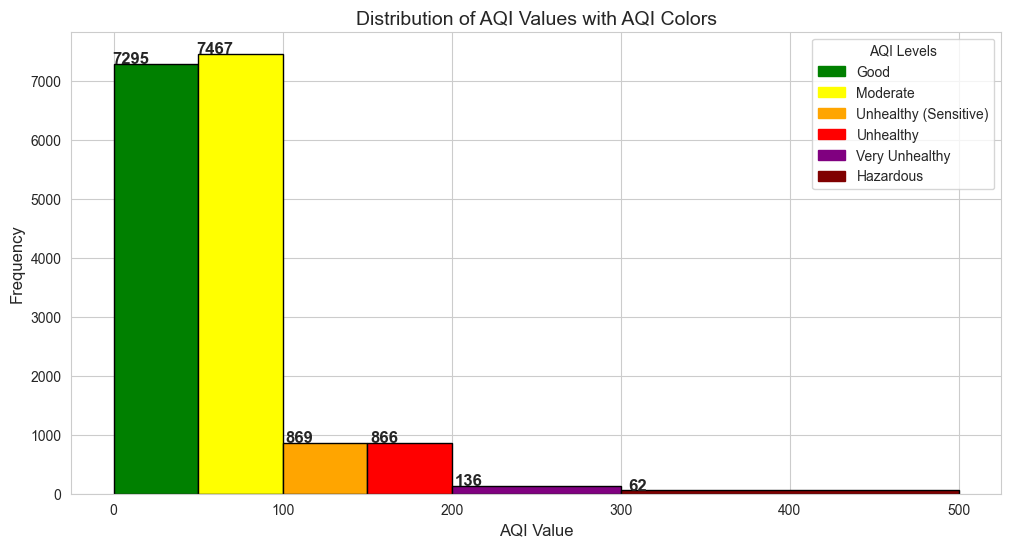

In [34]:
from matplotlib.patches import Patch
# Define AQI Ranges and Corresponding Colors
aqi_bins = [0, 50, 100, 150, 200, 300, 500]
aqi_colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']
aqi_labels = ['Good', 'Moderate', 'Unhealthy (Sensitive)', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Assign colors based on AQI range
df['Color'] = np.select(
    [
        (df['AQI Value'] <= 50),
        (df['AQI Value'] > 50) & (df['AQI Value'] <= 100),
        (df['AQI Value'] > 100) & (df['AQI Value'] <= 150),
        (df['AQI Value'] > 150) & (df['AQI Value'] <= 200),
        (df['AQI Value'] > 200) & (df['AQI Value'] <= 300),
        (df['AQI Value'] > 300)
    ],
    aqi_colors,
    default='gray'  # Explicitly set a default color
)

# Create the histogram
plt.figure(figsize=(12, 6))

# Plot histogram and get the bars
n, bins, patches = plt.hist(df['AQI Value'], bins=aqi_bins, edgecolor='black')

# Assign colors to bars
for patch, color in zip(patches, aqi_colors):
    patch.set_facecolor(color)

# Add count labels on top of bars
for i in range(len(n)):
    plt.text(bins[i] + 10, n[i] + 1, str(int(n[i])), ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("AQI Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of AQI Values with AQI Colors", fontsize=14)

# Create a custom legend
legend_patches = [Patch(color=aqi_colors[i], label=aqi_labels[i]) for i in range(len(aqi_labels))]
plt.legend(handles=legend_patches, title="AQI Levels")

# Show plot
plt.show()